#SVD

In [ ]:
# Singular-value decomposition
from scipy.linalg import svd
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [ ]:
# Reconstruct SVD
from numpy import dot

# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1])) # Sigma Tidak SQUARE
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [ ]:
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

#SVD untuk Reduksi Dimensi

In [ ]:
A = np.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [ ]:
from sklearn.decomposition import TruncatedSVD
# define array
from numpy import array
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
print("Ukuran A = ", A.shape)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)
print("Ukuran Truncated A = ", result.shape)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
Ukuran A =  (3, 10)
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]
Ukuran Truncated A =  (3, 2)


#**Topic Modelling**
sumber: Matrix Factorization (C) Taufik Sutanto - 2021 tau-data Indonesia ~ 
https://tau-data.id/rng/




In [ ]:
# Data sederhana yang akan dilakukan adalah 9 judul buku ini
d1 = "The Neatest Little Guide to Stock Market Investing"
d2 = "Investing For Dummies, 4th Edition"
d3 = "The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns"
d4 = "The Little Book of Value Investing"
d5 = "Value Investing: From Graham to Buffett and Beyond"
d6 = "Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!"
d7 = "Investing in Real Estate, 5th Edition"
d8 = "Stock Investing For Dummies"
d9 = "Rich Dad's Advisors: The ABC’s of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss"
# Data adalah kumpulan dokumen sehingga
D = [d1, d2, d3, d4, d5, d6, d7, d8, d9]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(D)

A.shape

(9, 37)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'neatest': 25, 'little': 21, 'guide': 16, 'stock': 34, 'market': 22, 'investing': 19, 'dummi


In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (9, 9) (9,) (37, 37)
[4.54521696 3.66729152 2.87340127 2.52846421 2.0056327  1.90952942
 1.65889315 1.33047338 1.02540653]


In [ ]:
# Mari kita plot hasil diatas

x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'neatest': 25, 'little': 21, 'guide': 16, 'stock': 34, 'market': 22, 'investing': 19, 'dummies': 9, '4th': 0, 'edition': 10, 'book': 4, 'common': 7, 'sense': 32, 'way': 36, 'guarantee': 15, 'fair': 12, 'share': 33, 'returns': 29, 'value': 35, 'graham': 14, 'buffett': 5, 'rich': 30, 'dad': 8, 'invest': 18, 'poor': 26, 'middle': 23, 'class': 6, 'real': 28, 'estate': 11, '5th': 1, 'advisors': 3, 'abc': 2, 'secrets': 31, 'finding': 13, 'hidden': 17, 'profits': 27, 'investors': 20, 'miss': 24}


In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['4th', '5th', 'abc', 'advisors', 'book', 'buffett', 'class', 'common', 'dad']


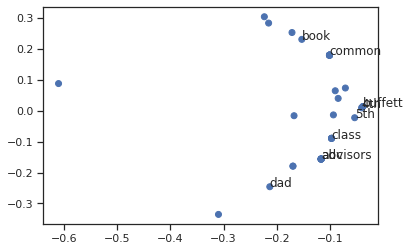

In [ ]:
# Sudah siap untuk kita plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

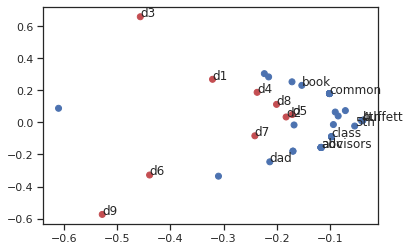

In [ ]:
# Mari kita gabungkan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']

# Saatnya kita plot
# Mulai dari "Words" terlebih dahulu dengan warna biru "b"
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))
    
# Lalu judul (dokumen) dengan warna Merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))
# Analisa Plotnya .... misal perhatikan kata "dummies"

#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*

Gunakan 20 Newsgroup data berikut ([Sumber Data](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)). Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi *topic modelling* pada data tersebut.

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
sns.set(style="ticks", color_codes=True)
pd.set_option("display.max_colwidth", 200)

"Done"

'Done'

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# melihat isi data
documents[:5]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
df = pd.DataFrame({'document':documents})
df.head(5)

,document
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."


In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


preprocessing

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# membersihkan data
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['clean_doc'] = df['clean_doc'].apply(lambda x: x.lower())
df.head(5)

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences su...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that wil...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize that principle your strongest points would still like know question this sort about arab countries want continue this think tank charade yours your fixation israel must stop might...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss about this proposal much change last product this area priced over suspect clipper phones will came customer with automatically preregistered with government author...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well will have change scoring playoff pool unfortunately have time right will certainly post scoring rules tomorrow does matter enter anyway good keith keller rangers quakers kkeller mail upenn le...


In [ ]:
# stopwords
# memecah kalimat menjadi per kata
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())
# menghapus stopwords
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# menggabungkan kata menjaadi kalimat kembali
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['clean_doc'] = detokenized_doc

In [ ]:
df.head(5)

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,sure story biased disagree statement media ruin israels reputation rediculous media israeli media world having lived europe realize incidences described letter occured media ignore subsidizing isr...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need pretend happily maybe start newsgroup atheist hard bu...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",realize principle strongest points like know question sort arab countries want continue think tank charade fixation israel stop start asking sort questions arab countries realize work arab countri...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss proposal change product area priced suspect clipper phones came customer automatically preregistered government authorities aside attempting legitimize solidify pos...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",change scoring playoff pool unfortunately time right certainly post scoring rules tomorrow matter enter good keith keller rangers quakers kkeller mail upenn league champs


In [ ]:
# membuat document-term matriks
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
# melihat vocab yang ada pada data
print(vectorizer.vocabulary_)

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

topic modelling

In [ ]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [ ]:
Topics = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    Topics_comp = zip(Topics, comp)
    sorted_terms = sorted(Topics_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(Topics)

A.shape

(1000, 1000)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (1000, 1000) (1000,) (1000, 1000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

visualisasi

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

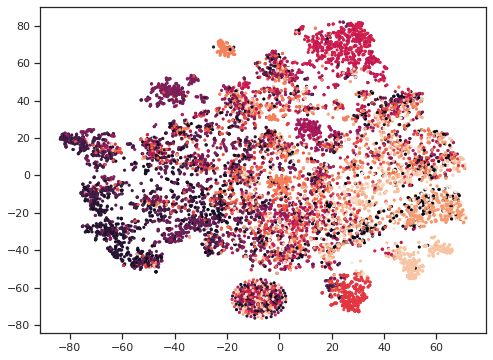

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()